# Regresión Logística

* La regresión logística ayuda a clasificar nuestros registros en 2 o más categorías:
    + Predecir si un cliente aleatorio que entra en la tienda va a comprar un producto en particular basandonos en sus ingresos, género, historial de compras, historial de publicidad...
    + Predecir si un equipo de fútbol va a ganar o a perder un partido sabiendo el rival, los detalles del equipo, el tiempo que va a hacer, la alineación, el estadio,las horas de entrenamiento.
    
**Similitud y diferencias entre Regresión Lineal y Regresión Logística.**
 
|   Métodos           |    Regresión Lineal            |        Regresión Logística         |
|---------------------|--------------------------------|------------------------------------|
|Variables Predictoras|Numéricas continuas, Categóricas|   Numéricas continuas, Categóricas |
|    Predicciones     |      Numéricas continuas       |              Categóricas           |
|      Relación       |             Lineal             |  Lineal (Con Alguna Transformación)|

**Funciones de cada Método**

$$\text{Regresión Lineal: }$$ 
$$y = \alpha + \beta\cdot x$$

$$\text{Regresión Logística: }$$ 
$$y =  \frac{1}{1+e^{-(\alpha + \beta \cdot x)}}$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math,Latex 
from matplotlib import style
style.use("ggplot")

**Las tablas de contingencia**

In [2]:
data = pd.read_csv("../datasets/gender-purchase/Gender Purchase.csv")
data.head()

,Gender,Purchase
0,Female,Yes
1,Female,Yes
2,Female,No
3,Male,No
4,Male,Yes


In [3]:
data.shape

(511, 2)

In [4]:
data.Gender.value_counts()

Female    265
Male      246
Name: Gender, dtype: int64

In [5]:
contigence = pd.crosstab(data.Gender,data.Purchase)
contigence

Purchase,No,Yes
Gender,,
Female,106,159
Male,125,121


In [6]:
contigence.sum(axis=0)

Purchase
No     231
Yes    280
dtype: int64

In [7]:
contigence.sum(axis=1)

Gender
Female    265
Male      246
dtype: int64

In [8]:
contigence_all = pd.crosstab(data.Gender,data.Purchase,margins=True)
contigence_all

Purchase,No,Yes,All
Gender,,,
Female,106,159,265
Male,125,121,246
All,231,280,511


In [9]:
print("Porcentaje Por Filas")
contigence.astype("float").div(contigence.sum(axis=1),axis=0)

Porcentaje Por Filas


Purchase,No,Yes
Gender,,
Female,0.40000,0.60000
Male,0.50813,0.49187


In [10]:
print("Porcentaje por Columnas")
contigence.astype("float").div(contigence.sum(axis=0),axis=1)

Porcentaje por Columnas


Purchase,No,Yes
Gender,,
Female,0.458874,0.567857
Male,0.541126,0.432143


### La probabilidad condicional

* ¿Cuál es la probabilidad de que un cliente compre un producto si es hombre?
* ¿Cuál es la probabilidad de que sabiendo que un cliente compra un producto sea mujer?

In [11]:
display(Math(r"P(Purchase|Male) = \frac{\text{Número total de compras hechas por hombres}}{\text{Número total de hombres del grupo}} = \frac{Purchase\cap Male}{Male} = \frac{121}{246} = 0.491869"))

<IPython.core.display.Math object>

In [12]:
display(Math(r"P(No\ Purchase|Male) = 1 - P(Purchase|Male) = 1-\frac{121}{246}=0.50813"))

<IPython.core.display.Math object>

In [13]:
display(Math(r"P(Purchase|Female) = \frac{\text{Número total de compras hechas por mujeres}}{\text{Número total de mujeres del grupo}} = \frac{Purchase\cap Female}{Female} = \frac{159}{265} = 0.60"))

<IPython.core.display.Math object>

In [14]:
display(Math(r"P(No\ Purchase|Female) = 1 - P(Purchase|Female) = 1-\frac{106}{265}=0.40"))

<IPython.core.display.Math object>

In [15]:
display(Math(r"P(Male|Purchase) = \frac{Male\cap Purchase}{Purchase}= \frac{121}{280} = 0.4321"))

<IPython.core.display.Math object>

In [16]:
display(Math(r"P(Female|Purchase) = 1 - P(Male|Purchase) =0.5678 "))

<IPython.core.display.Math object>

In [17]:
display(Math(r"P(Male|No Purchase) = \frac{Male\cap No Purchase}{No Purchase}= \frac{125}{231} = 0.541125"))

<IPython.core.display.Math object>

In [18]:
display(Math(r"P(Female|No Purchase) = 1 - P(Male|No Purchase) =0.45887"))

<IPython.core.display.Math object>

### Ratio de las probabilidades
Cociente entre los casos de éxito sobre los de fracaso en el suceso estudiando y para cada grupo.

In [19]:
display(Math(r"P_m =\text{Probabilidad de hacer compras sabiendo que es un hombre} = \frac{121}{246}"))
display(Math(r"P_f =\text{Probabilidad de hacer compras sabiendo que es una mujer}=\frac{159}{265}"))
display(Math(r"odds \in [0,+\infty]"))
display(Math(r"Odds_{Purchase,male} = \frac{\text{Prob. Compre sabiendo que es hombre}}{\text{Prob. de que no compre sabiendo que es hombre}}=\frac{Pm}{1-Pm} = \frac{N_{p,m}}{N_{\bar p,m}}"))
display(Math(r"Odds_{Purchase,female} = \frac{\text{Prob. Compre sabiendo que es mujer}}{\text{Prob. de que no compre sabiendo que es mujer}}=\frac{Pf}{1-Pf} = \frac{N_{p,f}}{N_{\bar p,f}}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [20]:
pm,pf = 121/246,159/265
pm,pf

(0.491869918699187, 0.6)

In [21]:
odds_m,odds_f = pm/(1-pm),pf/(1-pf)
odds_m,odds_f

(0.9680000000000002, 1.4999999999999998)

In [22]:
contigence_all

Purchase,No,Yes,All
Gender,,,
Female,106,159,265
Male,125,121,246
All,231,280,511


* Si el ratio es superior a 1, es más probable el éxito que el fracaso. Cuanto mayor es el ratio, más probabilidad de éxito en nuestro suceso. 
* Si el ratio es exactamente igual a 1, éxito y fracaso son equiprobables (p=0.5).
* Si el ratio es menor que 1, el fracaso es más probable que el éxito. Cuanto menor es el ratio, menor probabilidad de éxito en nuestro suceso. 

**¿Cuál de los dos tiene más ratio?**

##### $$odds_{ratio} = \frac{odds_{purchase_male}}{odds_{purchase,female}}$$

In [23]:
odds_r = odds_m/odds_f
odds_r

0.6453333333333335

In [24]:
odds_r1 = odds_f/odds_m
odds_r1

1.5495867768595035

**Es más probable que una mujer compre que un hombre.**

### La Regresión Logística desde la Regresión Lineal

In [25]:
display(Math(r"\text{Regresión Lineal}"))
display(Math(r"y = \alpha+\beta\cdot x"))
display(Math(r"(x,y) \in[-\infty,+\infty]"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [26]:
display(Math("Regresion Logística"))
display(Math(r"Y\in\{0,1\}"))
display(Math(r"P\in [0,1]"))
display(Math(r"X\in [-\infty,+\infty]"))
display(Math(r"P = \alpha + \beta\cdot X"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**P es la probabilidad condicionada de éxito o de fracaso condicionada a la presencia de la variable X.**

In [27]:
display(Math(r"\frac{P}{1-P} = \alpha + \beta\cdot X \in [0,+\infty]"))

<IPython.core.display.Math object>

In [28]:
display(Math(r"In(\frac{P}{1-P}) = \alpha + \beta\cdot X"))

<IPython.core.display.Math object>

In [29]:
display(Math(r"""\left\{
                 \begin{array}{cr}
                 \frac{P}{1-P}\in [0,1] \Rightarrow In(\frac{P}{1-P})\in [-\infty,0])
                 \\ \frac{P}{1-P}\in [1,\infty] \Rightarrow In(\frac{P}{1-P})\in [0,+\infty])
                 \end{array}
                 \right."""))

<IPython.core.display.Math object>

In [30]:
display(Math(r"In(\frac{P}{1-P}) = \alpha + \beta \cdot X"))
display(Math(r"e^{In(\frac{P}{1-P})} = e^{\alpha + \beta \cdot X}"))
display(Math(r"\frac{P}{1-P} = e^{\alpha+\beta\cdot X}"))
display(Math(r"P= e^{\alpha+\beta\cdot X} -P\cdot e^{\alpha+\beta\cdot X}"))
display(Math(r"P+P\cdot e^{\alpha+\beta\cdot X}= e^{\alpha+\beta\cdot X} "))
display(Math(r"P\cdot(1+\cdot e^{\alpha+\beta\cdot X})= e^{\alpha+\beta\cdot X} "))
display(Math(r"P= \frac{e^{\alpha+\beta\cdot X}}{1+\cdot e^{\alpha+\beta\cdot X}} "))
display(Math(r"P= \frac{e^{\alpha+\beta\cdot X}}{1+\cdot e^{\alpha+\beta\cdot X}} \cdot \frac{e^{-(\alpha+\beta\cdot X)}}{e^{-(\alpha+\beta\cdot X)}}"))
display(Math(r"P= \frac{1}{1+\cdot e^{-(\alpha+\beta\cdot X)}} "))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Si a+bX es muy pequeño (negativo), entonces P tiende a 0
* Si a+bX = 0, P = 0.5
* Si a+bX es muy grande (positivo), entonces P tiende a 1

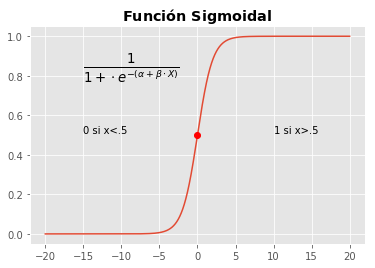

In [31]:
import numpy as np
x = np.linspace(-20,20,10000)
sigmoide = 1/(1+np.exp(-x))
plt.plot(x,sigmoide)
plt.plot(0,.5,"ro")
plt.title(r"$\mathbf{Función\ Sigmoidal}$")
plt.text(-15,0.51,"0 si x<.5")
plt.text(10,0.51,"1 si x>.5")
plt.text(-15,.82,r"$\frac{1}{1+\cdot e^{-(\alpha+\beta\cdot X)}}$",size=19)
plt.show()

### Regresión Logística Múltiple

In [32]:
display(Math(r"P = \frac{1}{1+e^{-(\alpha+\sum_{i=1}^n\beta_i\cdot X_i)}}"))

<IPython.core.display.Math object>

In [33]:
display(Math(r"\vec{\beta} = (\beta_1,\beta_2,...,\beta_n)"))
display(Math(r"\vec{X} = (x_1,x_2,...,x_n)"))
display(Math(r"P = \frac{1}{1+e^{-(\alpha+\vec{\beta}\cdot \vec{X})}}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [34]:
display(Math(r"u: X\Rightarrow \mathbb{R} \text{ Representa la relación de preferencia 'Al menos, tan bueno como' si para cada par } x,y \in X"))
display(Math(r"u(x)>u(y) \text{ si y solo si x 'es al menos, tan bueno como' y} "))

<IPython.core.display.Math object>

<IPython.core.display.Math object>